### Importing the libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn import datasets

In [2]:
#Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [9]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Visualizations

**Creating a pairplot.**

Question: Which flower is the most separable?

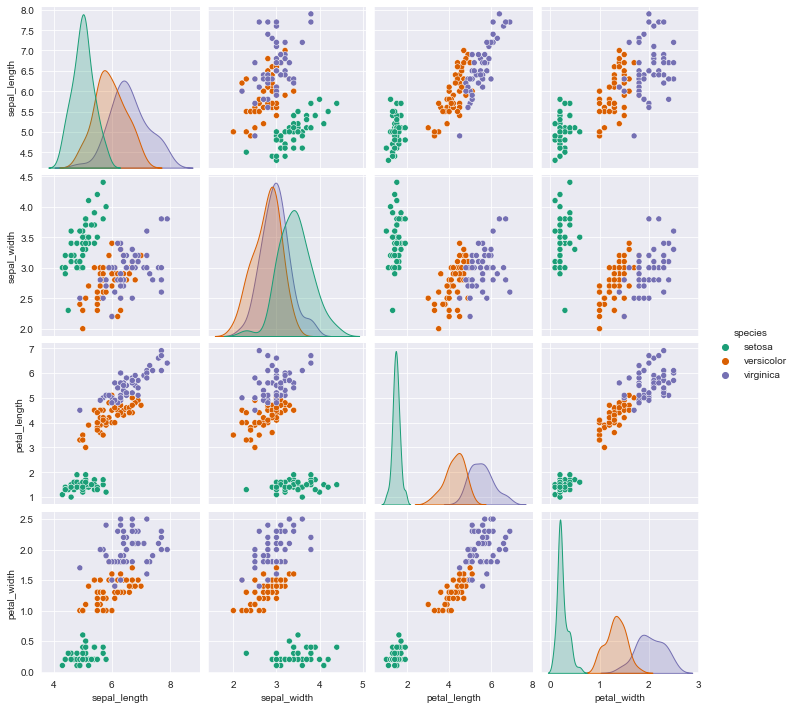

In [13]:
 sns.pairplot(iris,hue='species',palette='Dark2')

Answer: Setosa is the most separable.

---

**Creating a kde plot of sepal_length versus sepal width for setosa species of flower.**

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

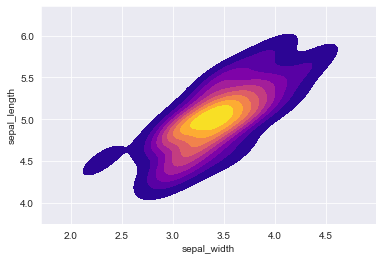

In [14]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

**Checking the correlation among features by creating a heatmap.**

<AxesSubplot:>

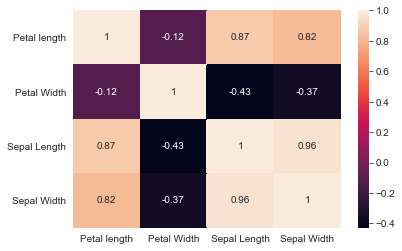

In [15]:
sns.heatmap(data.corr(),annot=True)

### Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Creating the Decision tree model

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predicting & Evaluation

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.93      0.90        15
   virginica       0.94      0.89      0.91        18

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [21]:
print(confusion_matrix(y_test,predictions))

[[12  0  0]
 [ 0 14  1]
 [ 0  2 16]]


In [24]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, predictions))

Accuracy Score: 0.9333333333333333


### Displaying the Decision tree

In [84]:
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydot

features = list(iris.columns[1:])

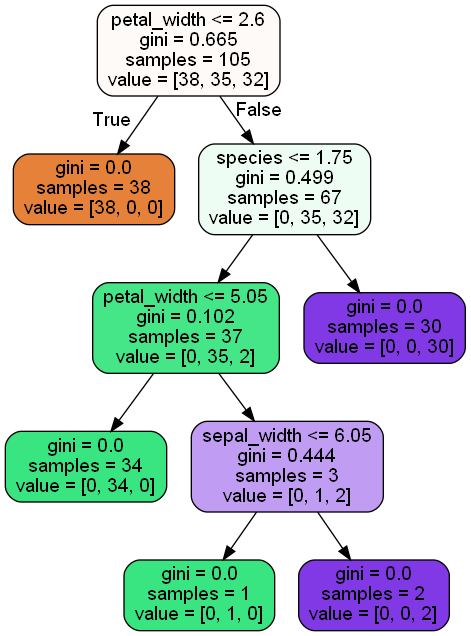

In [85]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 